# Project: Investigate a Dataset - [No Show Medical Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 110,527 medical appointments medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
<li> ‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li> ‘Neighborhood’ indicates the location of the hospital.</li>
<li> ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
</ul>

The dataset is available on Kaggle: [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments)
<ul>
<li>Data Dictionary (14 features):
<li>PatientId: patient unique ID</li>
<li>AppointmentID: appointment unique ID</li>
<li>Gender: Male or Female</li>
<li>ScheduledDay: the day someone called or registered the appointment, this is before appointment of course</li>
<li>AppointmentDay: the day of the actual appointment, when they have to visit the doctor</li>
<li>Age: How old is the patient</li>
<li>Neighbourhood: where the appointment takes place</li>
<li>Scholarship: True of False</li>
<li>Hipertension: True or False</li>
<li>Diabetes: True or False</li>
<li>Alcoholism: True or False</li>
<li>Handcap: True or False</li>
<li>SMS_received: True or False</li>
<li>No-show : True or False</li>
</ul>



### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Import all necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load the data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Print out the last few lines. 
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Inspect data types.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# Inspect data for null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Inspect data shape.
df.shape

(110527, 14)

In [7]:
# Do basic statistics.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Inspect data for Unique values.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# Inspect data for duplicated rows.
sum(df.duplicated())

0

In [10]:
# Inspect data for duplicated PatientId.
sum(df.duplicated(['PatientId']))

48228


### Comments

<ul>
<li> After intial inspection, the data set consists of 110527 rows and 14 columns, with no missing values.</li>
<li> The mean age for our sample is 37 years with standard deviation of 23 years.</li>
<li> The data contains no duplicated rows but contains 48228 duplicated PatientID, they maybe viewed as recurrent/ returning patients or maybe they scheduled more than one appointment, further investigation will be done. </li>
</ul>




### Data Cleaning

<ul>
<li> Assessing the data revealed a few problems that needs to be addressed </li>
</ul>

### Problems with the data

<ul>
<li> The minimum age is -1 indicate an error in the data that needs to be handled.</li>
<li> The handcap column has amaximum value of 4 and the number of unique values is 5 even though it should only have 2 values (0 or 1) also indicate an error in the data that needs to be handled.</li>
<li> From inspecting the data type ScheduledDay should be converted to datetime. </li>
</ul>

In [11]:
# delete the patients with Age value -1
df = df.drop(df[df.Age < 0].index)
# delete the patients with Handcap value more than 1
df = df.drop(df[df.Handcap > 1].index)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# drop AppointmentID so that we can check if there are duplicated appointmnets with different IDs.
df.drop(['AppointmentID'], axis=1 , inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# converting ScheduledDay to datetime.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110327 non-null float64
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns]
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 11.8+ MB


In [14]:
# Correct typos in columns names
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'}, inplace = True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# Add column to calculate the multi disease score
column_names = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
df['Multi_Disease_Score']= df[column_names].sum(axis=1)

In [16]:
# Let's try to check the duplicated rows after removing the AppointmentID cloumn.
# this way we will get to see how many repeated patientId reserved the appointment at the same ScheduledDay
sum(df.duplicated())

615

In [17]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [18]:
# After dropping the duplicated appointments, we will drop another column that will not be used in this analysis.
df.drop(['Neighbourhood'], axis=1 , inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Multi_Disease_Score
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No,1
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No,0
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No,0
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No,0
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No,2


In [19]:
print(df.shape)

(109712, 13)


<a id='eda'></a>
## Exploratory Data Analysis

After inspecting the data & cleaning it now it's time to analyze our dataset and get some insights to answer our original question.

### What is the percentage of No show appointments?

         PatientId
No_Show           
No       79.889164
Yes      20.110836
No_Show
No     87648
Yes    22064
Name: PatientId, dtype: int64


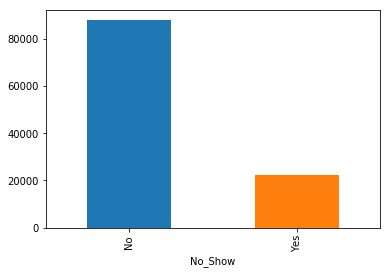

In [20]:
# check the total percentage of no show
print(pd.DataFrame(df.groupby('No_Show')['PatientId'].count()).apply(lambda x : x / sum(x) * 100 ))
print(df.groupby('No_Show')['PatientId'].count());
df.groupby('No_Show')['PatientId'].count().plot(kind='bar');

## Comment

Around 20% (corresponding to 22278 from 109712) don't show for their appointments.

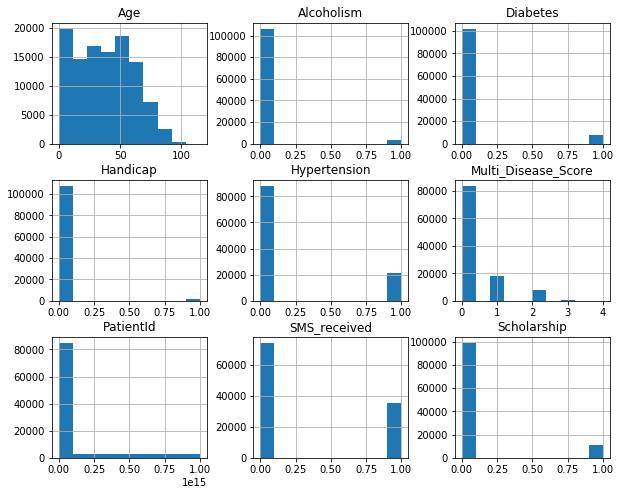

In [21]:
# use histograms to examine the data.
df.hist(figsize=(10,8));

In [22]:
# Separate patients into 2 groups according to their no show status.
NoShow = df.No_Show == 'Yes'
Show = df.No_Show == 'No'
print(df[Show].count())
print(df[NoShow].count())

PatientId              87648
Gender                 87648
ScheduledDay           87648
AppointmentDay         87648
Age                    87648
Scholarship            87648
Hypertension           87648
Diabetes               87648
Alcoholism             87648
Handicap               87648
SMS_received           87648
No_Show                87648
Multi_Disease_Score    87648
dtype: int64
PatientId              22064
Gender                 22064
ScheduledDay           22064
AppointmentDay         22064
Age                    22064
Scholarship            22064
Hypertension           22064
Diabetes               22064
Alcoholism             22064
Handicap               22064
SMS_received           22064
No_Show                22064
Multi_Disease_Score    22064
dtype: int64


### Does Gender has an effect on No show appointments?

F    71315
M    38397
Name: Gender, dtype: int64


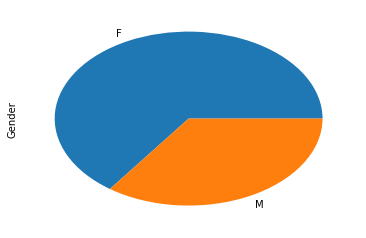

In [23]:
# check the number of females & males
print(df.Gender.value_counts())
df.Gender.value_counts().plot(kind='pie');

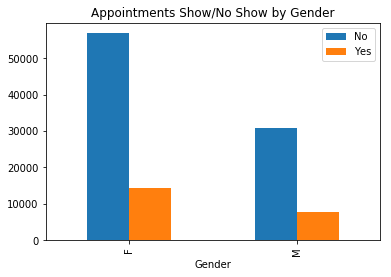

In [24]:
# Plot bar chart for No show/ Show numbers
df.groupby('Gender')['No_Show'].value_counts().unstack().plot(kind='bar')
plt.title("Appointments Show/No Show by Gender")
plt.legend();


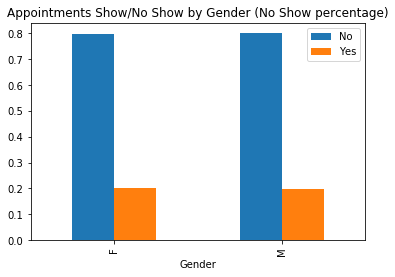

In [25]:
# Plot bar chart for No show/ Show percentage
df.groupby('Gender')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.title("Appointments Show/No Show by Gender (No Show percentage)")
plt.legend();

### Comment:

Number of female patients close to double that of male patients, and so the missed appointments by female patients seems to be a lot more, but by checking the percentage, it's clear that gender has no effect on No Show appointments, since both genders have around 20% missed appointments.

### Does Scholarship has an effect on No show appointments?

In [26]:
# calculate the count of Scholarship and no scholarship patients.
print(df.Scholarship.value_counts())

0    98928
1    10784
Name: Scholarship, dtype: int64


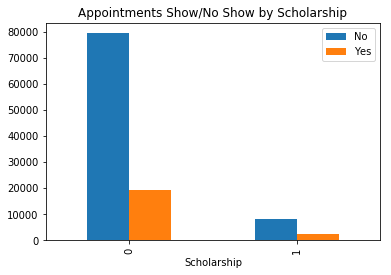

In [27]:
# Plot bar chart for No show/ Show numbers
df.groupby('Scholarship')['No_Show'].value_counts().unstack().plot(kind='bar');
plt.title("Appointments Show/No Show by Scholarship")
plt.legend();

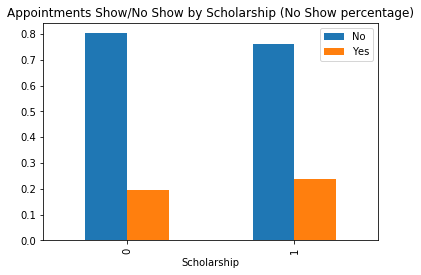

In [28]:
# Plot bar chart for No show/ Show percentage
df.groupby('Scholarship')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.title("Appointments Show/No Show by Scholarship (No Show percentage)")
plt.legend();

### Comment:

Number of No Scholarship patients close to 9 times that of Scholarship patients, and by checking the percentage, the No Show percentage in patients with scholarship is around 25% which is 5% higher than the No Show percentage in patients with no Scholarship (20%).

### Does SMS received has an effect on No show appointments?

In [29]:
# Find number of patients who received SMS
df.SMS_received.value_counts()

0    74277
1    35435
Name: SMS_received, dtype: int64

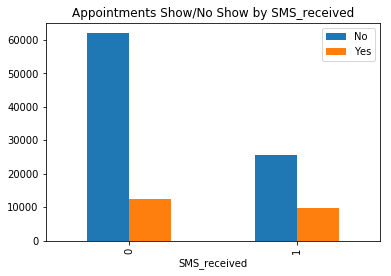

In [30]:
# Plot bar chart for No show/ Show numbers
df.groupby('SMS_received')['No_Show'].value_counts().unstack().plot(kind='bar');
plt.title("Appointments Show/No Show by SMS_received")
plt.legend();

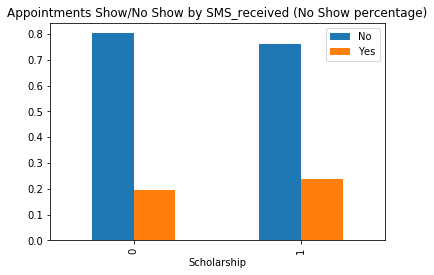

In [31]:
# Plot bar chart for No show/ Show percentage
df.groupby('Scholarship')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.title("Appointments Show/No Show by SMS_received (No Show percentage)")
plt.legend();

### Comment:

Percentage of patients who missed their appointment after receiving SMS is around 25% which is 5% higher than the No Show percentage in patients who didn't receive SMS (20%), which means that the SMS content needs revision.

### Does presence of chronic disease (Hypertension, Diabetes, Alcoholism, Handicap) has an effect on No show appointments?

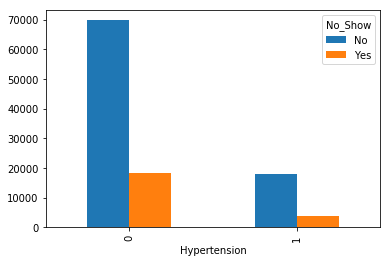

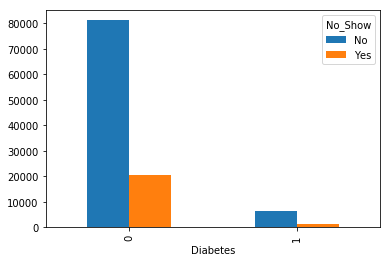

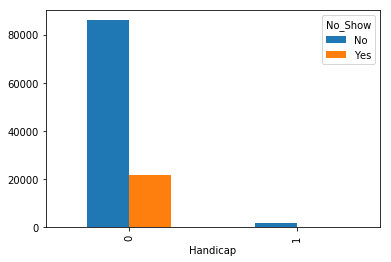

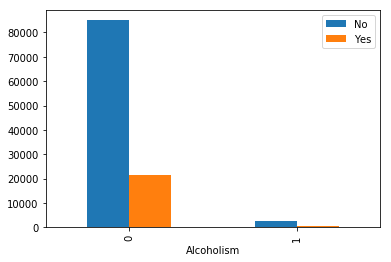

In [32]:
# Plot bar chart for No show/ Show numbers for each disease
df.groupby('Hypertension')['No_Show'].value_counts().unstack().plot(kind='bar')
df.groupby('Diabetes')['No_Show'].value_counts().unstack().plot(kind='bar')
df.groupby('Handicap')['No_Show'].value_counts().unstack().plot(kind='bar')
df.groupby('Alcoholism')['No_Show'].value_counts().unstack().plot(kind='bar')
plt.legend();

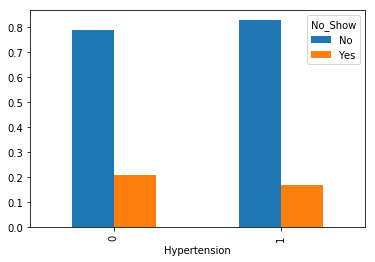

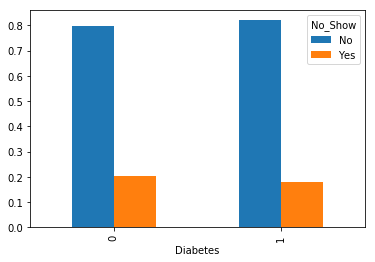

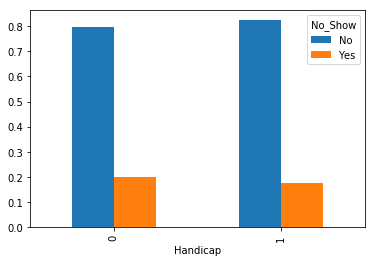

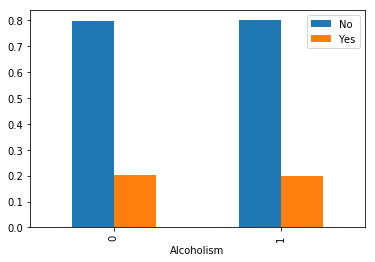

In [33]:
# Plot bar chart for No show/ Show percentage for each disease
df.groupby('Hypertension')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar')
df.groupby('Diabetes')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar')
df.groupby('Handicap')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar')
df.groupby('Alcoholism')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.legend();

### Comment:

Percentage of patients who suffer from Hypertension, Diabetes or Handicap and  missed their appointment is slightly lower than those who don't have chronic disease, Alcoholism on the other hand doesn't seem to have an effect on No show appointments.

### Does having more diseases (Hypertension, Diabetes, Alcoholism, Handicap) will affect the No show appointments?

In [34]:
# find number of patients who have no chronic disease, 1 or more
df.Multi_Disease_Score.value_counts()

0    83647
1    17922
2     7559
3      572
4       12
Name: Multi_Disease_Score, dtype: int64

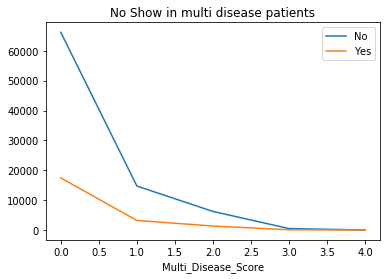

In [35]:
# Plot Line chart for No show/ Show numbers for each disease
df.groupby('Multi_Disease_Score')['No_Show'].value_counts().unstack().plot(kind='line')
plt.title("No Show in multi disease patients")
plt.legend();

In [36]:
def plot_attributes (title, xlabel, ylabel):
    title = plt.title (title)
    xlabel = plt.xlabel (xlabel)
    ylabel = plt.ylabel (ylabel)
    return plot_attributes

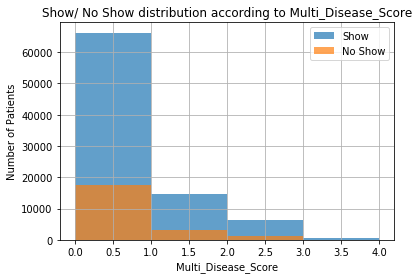

In [37]:
# Plot histogram for No show/ Show distribution according to Multi_Disease_Score
df.Multi_Disease_Score[Show].hist( bins=4, alpha=0.7, label='Show')
df.Multi_Disease_Score[NoShow].hist( bins=4, alpha=0.7, label='No Show')
plot_attributes ('Show/ No Show distribution according to Multi_Disease_Score', 'Multi_Disease_Score' , 'Number of Patients')
plt.legend();


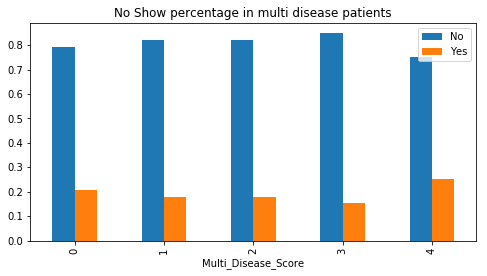

In [38]:
# Plot bar chart for No show/ Show percentage in Multi Disease patients
df.groupby('Multi_Disease_Score')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,4))
plt.title("No Show percentage in multi disease patients")
plt.legend();

### Comment:

In this dataset there are five categories of patients according to their multi disease score: 0 have no chronic disease (83647 patients), 1 have only 1 disease (17922 patients), 2 stands for 2 diseases, 3 stands for 3 diseases (7559 patients) and 4 who have all 4 diseases (Hypertension, Diabetes, Alcoholism, Handicap) but those are only 12 patients.
If we exclude the 12 patients with score of 4, then the patients with no chronic disease have the highest no show appointments percentage while patients with score 3 have the lowest no show appointments percentage.

### Is age considered a factor in No show appointments?

In [39]:
# calculate the mean age in both groups
print(df.Age[Show].mean())
print(df.Age[NoShow].mean())

37.7803144396
34.2423404641


In [40]:
# calculate the standard deviation for age in both groups
print(df.Age[Show].std())
print(df.Age[NoShow].std())

23.3420268364
21.9349815781


In [41]:
# calculate the median age in both groups
print(df.Age[Show].median())
print(df.Age[NoShow].median())

38.0
32.0


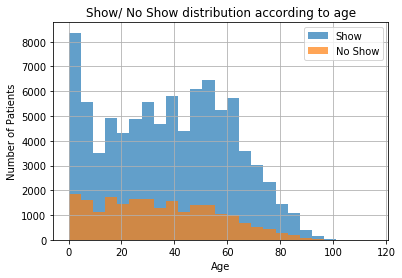

In [42]:
# plot histogram for age in both groups
df.Age[Show].hist( bins=25, alpha=0.7, label='Show')
df.Age[NoShow].hist( bins=25, alpha=0.7, label='No Show')
plot_attributes ('Show/ No Show distribution according to age', 'Age', 'Number of Patients')
plt.legend();

### Comment:

Patients that show to their appointments have mean age of 37.78 years with standard deviation of 23.34 years and median of 38.0 years, While patients that don't show have mean age of 34.24 years with standard deviation of 21.93 years and median of 32.0, meaning that older patients are more likely to show on their appointment compared to more youthful patients.

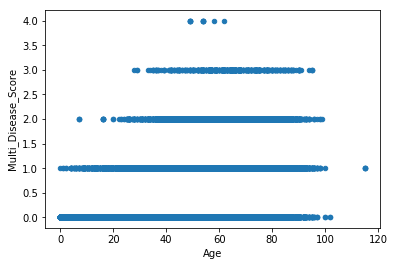

In [43]:
# Scatter plot for Age & Multi disease score.
df.plot(x='Age', y='Multi_Disease_Score', kind='scatter');

In [44]:
# Let's drop the data for multi dsease score = 4 since they are only 12 patients.
df[Show] = df.drop(df[df.Multi_Disease_Score == 4].index)
df[NoShow] = df.drop(df[df.Multi_Disease_Score == 4].index)

In [45]:
# find average age for each Multi disease score in both Show/ No Show groups
print(df[Show].groupby('Multi_Disease_Score').Age.mean())
print(df[NoShow].groupby('Multi_Disease_Score').Age.mean())

Multi_Disease_Score
0.0    31.059149
1.0    56.886263
2.0    62.004340
3.0    64.115464
Name: Age, dtype: float64
Multi_Disease_Score
0.0    28.435067
1.0    53.616588
2.0    61.819880
3.0    62.183908
Name: Age, dtype: float64


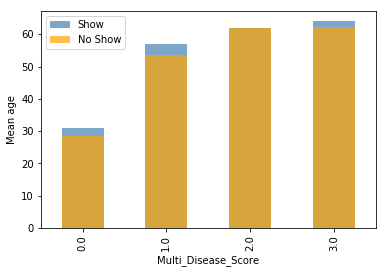

In [46]:
# Plot stacked bar chart to compare the average age for each multi disease score in both show/ no show groups.
df[Show].groupby('Multi_Disease_Score').Age.mean().plot(kind = 'bar', alpha = 0.7, label = 'Show', color ='steelblue')
df[NoShow].groupby('Multi_Disease_Score').Age.mean().plot(kind = 'bar',alpha = 0.7, label = 'No Show', color = 'orange')
plt.xlabel('Multi_Disease_Score')
plt.ylabel('Mean age')
plt.legend();

### Comment:
As expected, people with no chronic disease have the youngest mean age in both show & no show group, also the mean age increases with the multi disease score. also when comparing the average/mean age with chronic diseases for both groups we realize that for the Show group with scores 0, 1, 3 the average age is  higher than the no show group.

<a id='conclusions'></a>
## Conclusions

<ul>
<li> After examining the dataset, it originally contained 110,527 appointments with about 20% of the patients didn't show up for their appointments.</li>
<li> Most of the patients were female, youth, with no chronic diseases.</li>
<li> The original question was: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 
<li> To Answer that question we examined these factors:
    </li>
<li> 1- Gender: both genders have around 20% missed appointments hence, gender has no effect on No Show appointments.</li>
<li> 2- Scholarship: the No Show percentage in patients with scholarship is around 25% which is 5% higher than the No Show percentage in patients with no Scholarship (20%) hence, presence scholarship has effect on No Show appointments.</li>   
<li> 3- SMS Received: Percentage of patients who missed their appointment after receiving SMS is around 25% which is 5% higher than the No Show percentage in patients who didn't receive SMS (20%), which means that SMS received has effect on No Show appointments. </li>  
<li> 4- Presence of Chronic disease: Percentage of patients who suffer from Hypertension, Diabetes or Handicap and missed their appointment is slightly lower than those who don't have chronic disease, Alcoholism on the other hand doesn't seem to have an effect on No show appointments. Hence, except for Alcoholism, the other 3 diseases have effect on the No Show appointments. </li> 
<li> 5- Presence of multiple diseases: patients with no chronic disease have the highest No show appointments percentage while patients with 3 diseases have the lowest No show appointments percentage. Hence, Presence of multiple diseases has effect on the No Show appointments </li> 
<li> 6- Age: older patients are more likely to show on their appointment compared to more youthful patients and when comparing the average/mean age with chronic diseases for both No show/ show appointments we realize that for the Show group with no disease, 1 chronic disease and 3 diseases the average age is higher than the No show group. Hence, Age seems to have an effect on the No Show appointments </li>     
</ul>

## Recommendations:

<ul>
    <li> 1- The SMS content needs revision as it not only didn't help in increasing patients attendence to their appointments but also the patients who received SMS had higher no show percentage.</li>
    <li> 2- Despite the fact that older patients and patients with chronic diseases had less no show appointments, more action needs to be be taken to increase their Show percentage since they are more likely to need these appointments, for example: transportation availability</li>
    <li> 3- For younger patients and patients with no chronic diseases, more counseling should be done before scheduling their appointments, maybe providing hotlines with healthcare specialists to review their symptoms before reserving an appointment.</li>
    <li> 4- More steps should be taken to remind the patients of their appointments and follow up if the appointment is missed to find why it was missed, these questionnaires/ surveys will help find more factors to predict whether the patients will show for their appointments.</li>
</ul>

## Limitations:

<ul>
    <li> 1- The data set is old and includes sample from 29th April 2016 to 8th June 2016, if it was more recent and included a longer duration, better results would have been found.</li>
    <li> 2- I didn't include the ScheduledDay, AppointmentDay and Neighbourhood in my analysis, further investigation in these sections may yield more results.</li>
    <li> 3- More evaluations can be done to find the strong correlations which can be used to build a model to predict the No Show/ Show appointments.  </li>
</ul>



In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0